In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
planets = pd.read_csv("PSCompPars_2025.05.19_18.58.18.csv", comment = "#")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
planets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,-0.050000,0.0,1.178000,0.000000e+00,0.000000e+00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.4640,0.1230,-0.1250,0.0,Msini,0.2380,0.0070,-0.0070,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4874.00,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.450000,0.080000,-0.080000,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,-3.200000,0.0,1.530000,7.000000e-02,-7.000000e-02,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.7400,2.5000,-2.5000,0.0,Msini,0.0800,0.0300,-0.0300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.00,46.00,-46.00,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.930000,0.070000,-0.070000,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,-0.120000,0.0,0.775000,0.000000e+00,0.000000e+00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.5590,0.1140,-0.1220,0.0,Msini,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4888.00,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.550000,0.060000,-0.070000,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,-1.872560,0.0,2.774000,1.090000e-01,-1.200000e-01,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.0530,1.6320,-0.8830,0.0,Mass,0.3730,0.0080,-0.0060,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 V,5338.00,25.00,-25.00,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.450000,0.020000,-0.020000,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,-1.000000,0.0,1.660000,3.000000e-02,-3.000000e-02,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.7800,0.0800,-0.0800,0.0,Msini,0.6800,0.0200,-0.0200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.00,8.00,-8.00,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.360000,0.010000,-0.010000,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.01100,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

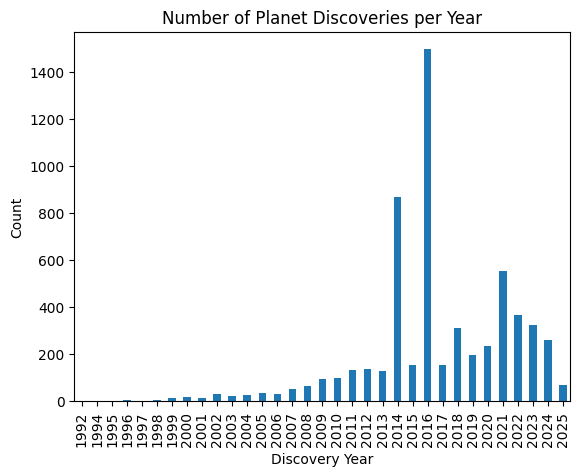

In [5]:
df = planets.copy()
year_counts = df['disc_year'].dropna().astype(int).value_counts().sort_index()
plt.figure()
year_counts.plot(kind='bar')
plt.title('Number of Planet Discoveries per Year')
plt.xlabel('Discovery Year')
plt.ylabel('Count')
plt.show()

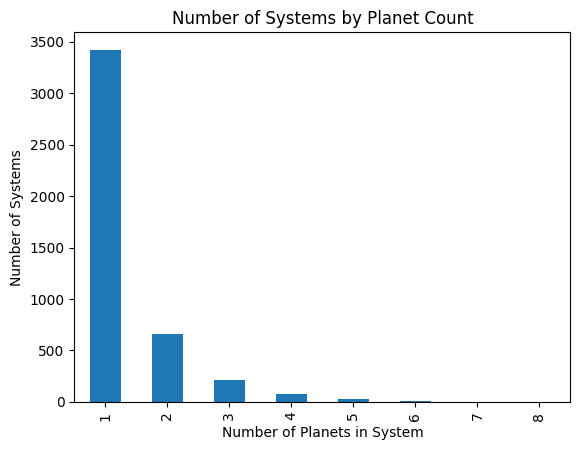

In [6]:
counts = df.groupby('hostname')['pl_name'].count().value_counts().sort_index()
plt.figure()
counts.plot(kind='bar')
plt.title('Number of Systems by Planet Count')
plt.xlabel('Number of Planets in System')
plt.ylabel('Number of Systems')
plt.show()

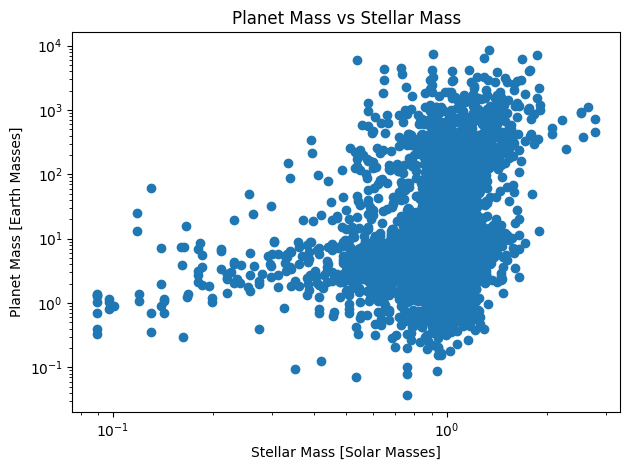

In [7]:
features = ['pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_insol', 'pl_eqt', 'st_mass', 'st_teff', 'st_met']
sub = df[features].dropna()
plt.figure()
plt.scatter(sub['st_mass'], sub['pl_bmasse'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stellar Mass [Solar Masses]')
plt.ylabel('Planet Mass [Earth Masses]')
plt.title('Planet Mass vs Stellar Mass')
plt.tight_layout()
plt.show()

In [8]:
df = planets.copy()


In [9]:
multi = (
    df[df['sy_snum'] > 1]
    [['hostname', 'pl_name', 'sy_snum']].drop_duplicates()
)

multi



,hostname,pl_name,sy_snum
0,11 Com,11 Com b,2
4,16 Cyg B,16 Cyg B b,3
6,18 Del,18 Del b,2
12,2MASS J01033563-5515561 A,2MASS J01033563-5515561 AB b,2
15,2MASS J0249-0557 A,2MASS J0249-0557 c,2
...,...,...,...
5887,psi1 Dra B,psi1 Dra B b,3
5892,tau Boo,tau Boo b,2
5898,ups And,ups And b,2
5899,ups And,ups And c,2


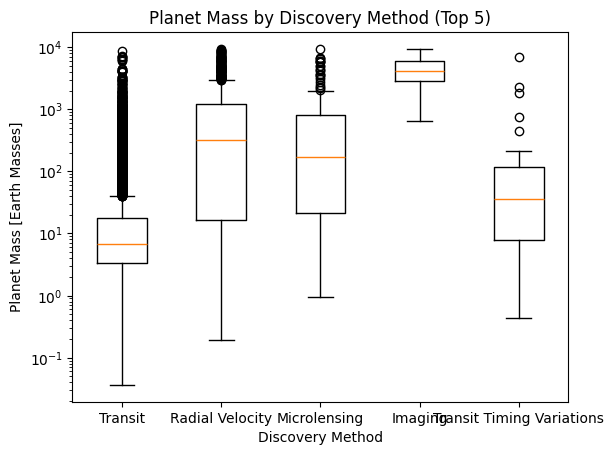

In [10]:
top5 = df['discoverymethod'].value_counts().nlargest(5).index
data = [df[df['discoverymethod'] == m]['pl_bmasse'].dropna() for m in top5]
plt.figure()
plt.boxplot(data, labels=top5)
plt.yscale('log')
plt.xlabel('Discovery Method')
plt.ylabel('Planet Mass [Earth Masses]')
plt.title('Planet Mass by Discovery Method (Top 5)')
plt.show()

In [11]:
planets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,-0.050000,0.0,1.178000,0.000000e+00,0.000000e+00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.4640,0.1230,-0.1250,0.0,Msini,0.2380,0.0070,-0.0070,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4874.00,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.450000,0.080000,-0.080000,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,-3.200000,0.0,1.530000,7.000000e-02,-7.000000e-02,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.7400,2.5000,-2.5000,0.0,Msini,0.0800,0.0300,-0.0300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.00,46.00,-46.00,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.930000,0.070000,-0.070000,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,-0.120000,0.0,0.775000,0.000000e+00,0.000000e+00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.5590,0.1140,-0.1220,0.0,Msini,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4888.00,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.550000,0.060000,-0.070000,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,-1.872560,0.0,2.774000,1.090000e-01,-1.200000e-01,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.0530,1.6320,-0.8830,0.0,Mass,0.3730,0.0080,-0.0060,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 V,5338.00,25.00,-25.00,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.450000,0.020000,-0.020000,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,-1.000000,0.0,1.660000,3.000000e-02,-3.000000e-02,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.7800,0.0800,-0.0800,0.0,Msini,0.6800,0.0200,-0.0200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.00,8.00,-8.00,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.360000,0.010000,-0.010000,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.01100,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [12]:
planets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,-0.050000,0.0,1.178000,0.000000e+00,0.000000e+00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.4640,0.1230,-0.1250,0.0,Msini,0.2380,0.0070,-0.0070,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4874.00,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.450000,0.080000,-0.080000,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,-3.200000,0.0,1.530000,7.000000e-02,-7.000000e-02,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.7400,2.5000,-2.5000,0.0,Msini,0.0800,0.0300,-0.0300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.00,46.00,-46.00,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.930000,0.070000,-0.070000,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,-0.120000,0.0,0.775000,0.000000e+00,0.000000e+00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.5590,0.1140,-0.1220,0.0,Msini,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4888.00,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.550000,0.060000,-0.070000,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,-1.872560,0.0,2.774000,1.090000e-01,-1.200000e-01,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.0530,1.6320,-0.8830,0.0,Mass,0.3730,0.0080,-0.0060,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 V,5338.00,25.00,-25.00,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.450000,0.020000,-0.020000,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,-1.000000,0.0,1.660000,3.000000e-02,-3.000000e-02,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.7800,0.0800,-0.0800,0.0,Msini,0.6800,0.0200,-0.0200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.00,8.00,-8.00,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.360000,0.010000,-0.010000,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.01100,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [13]:
planets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,-0.050000,0.0,1.178000,0.000000e+00,0.000000e+00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.4640,0.1230,-0.1250,0.0,Msini,0.2380,0.0070,-0.0070,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4874.00,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.450000,0.080000,-0.080000,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,-3.200000,0.0,1.530000,7.000000e-02,-7.000000e-02,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.7400,2.5000,-2.5000,0.0,Msini,0.0800,0.0300,-0.0300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.00,46.00,-46.00,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.930000,0.070000,-0.070000,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,-0.120000,0.0,0.775000,0.000000e+00,0.000000e+00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.5590,0.1140,-0.1220,0.0,Msini,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4888.00,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.550000,0.060000,-0.070000,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,-1.872560,0.0,2.774000,1.090000e-01,-1.200000e-01,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.0530,1.6320,-0.8830,0.0,Mass,0.3730,0.0080,-0.0060,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 V,5338.00,25.00,-25.00,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.450000,0.020000,-0.020000,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,-1.000000,0.0,1.660000,3.000000e-02,-3.000000e-02,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.7800,0.0800,-0.0800,0.0,Msini,0.6800,0.0200,-0.0200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.00,8.00,-8.00,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.360000,0.010000,-0.010000,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.01100,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [1]:
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive

tbl = NasaExoplanetArchive.query_criteria(
    table="ps",
    select="pl_name,hostname,sy_snum,cb_flag,pl_orbincl,pl_dens,st_age",
    order="pl_name"
)
tbl = tbl.to_pandas()
tbl

C:\Users\nghis\AppData\Local\Temp\ipykernel_15464\2406895675.py:1: DeprecationWarning: the ``nasa_exoplanet_archive`` module has been moved to astroquery.ipac.nexsci.nasa_exoplanet_archive, please update your imports.
  from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive


,pl_name,hostname,sy_snum,cb_flag,pl_orbincl,pl_dens,st_age
0,11 Com b,11 Com,2,0,NaN,NaN,NaN
1,11 Com b,11 Com,2,0,NaN,NaN,NaN
2,11 Com b,11 Com,2,0,NaN,NaN,NaN
3,11 UMi b,11 UMi,1,0,NaN,NaN,1.56
4,11 UMi b,11 UMi,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
38463,ups And d,ups And,2,0,NaN,NaN,NaN
38464,ups Leo b,ups Leo,1,0,NaN,NaN,NaN
38465,xi Aql b,xi Aql,1,0,NaN,NaN,NaN
38466,xi Aql b,xi Aql,1,0,NaN,NaN,NaN


In [2]:
tbl.isna().sum()

pl_name           0
hostname          0
sy_snum           0
cb_flag           0
pl_orbincl    21392
pl_dens       35958
st_age        29146
dtype: int64

In [3]:
grouped_tbl = tbl.groupby(['pl_name', 'hostname', 'sy_snum', 'cb_flag']).max().reset_index()
grouped_tbl

,pl_name,hostname,sy_snum,cb_flag,pl_orbincl,pl_dens,st_age
0,11 Com b,11 Com,2,0,NaN,NaN,NaN
1,11 UMi b,11 UMi,1,0,NaN,NaN,1.56
2,14 And b,14 And,1,0,NaN,NaN,NaN
3,14 Her b,14 Her,1,0,144.652,NaN,3.90
4,16 Cyg B b,16 Cyg B,3,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5907,ups And b,ups And,2,0,NaN,NaN,5.00
5908,ups And c,ups And,2,0,NaN,NaN,5.00
5909,ups And d,ups And,2,0,NaN,NaN,5.00
5910,ups Leo b,ups Leo,1,0,NaN,NaN,NaN


In [7]:
df = pd.read_csv("exoplanet.csv")
df

,system_id,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,...,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,system_id.1,cb_flag,pl_orbincl,pl_dens,is_habitable
0,11 Com,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,...,0.346,-0.346,4.44038,0.003848,-0.003848,11 Com,0,NaN,NaN,0
1,11 UMi,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,...,0.270,-0.270,4.56216,0.003903,-0.003903,11 UMi,0,NaN,NaN,0
2,14 And,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,...,0.240,-0.240,4.91781,0.002826,-0.002826,14 And,0,NaN,NaN,0
3,14 Her,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,...,0.016,-0.016,6.38300,0.000351,-0.000351,14 Her,0,144.652,NaN,0
4,16 Cyg,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,...,0.016,-0.016,6.06428,0.000603,-0.000603,16 Cyg,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,ups And,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,...,0.274,-0.274,3.98687,0.008937,-0.008937,ups And,0,NaN,NaN,0
5899,ups And,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,...,0.274,-0.274,3.98687,0.008937,-0.008937,ups And,0,NaN,NaN,0
5900,ups And,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,...,0.274,-0.274,3.98687,0.008937,-0.008937,ups And,0,NaN,NaN,0
5901,ups Leo,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,...,0.248,-0.248,4.03040,0.008513,-0.008513,ups Leo,0,NaN,NaN,0


In [8]:
new_df = pd.merge(left = df, right = grouped_tbl, how = 'left', on = ['pl_name', 'hostname', 'sy_snum', 'cb_flag'])
new_df

,system_id,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,...,sy_gaiamagerr1,sy_gaiamagerr2,system_id.1,cb_flag,pl_orbincl_x,pl_dens_x,is_habitable,pl_orbincl_y,pl_dens_y,st_age
0,11 Com,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,...,0.003848,-0.003848,11 Com,0,NaN,NaN,0,NaN,NaN,NaN
1,11 UMi,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,...,0.003903,-0.003903,11 UMi,0,NaN,NaN,0,NaN,NaN,1.56
2,14 And,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,...,0.002826,-0.002826,14 And,0,NaN,NaN,0,NaN,NaN,NaN
3,14 Her,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,...,0.000351,-0.000351,14 Her,0,144.652,NaN,0,144.652,NaN,3.90
4,16 Cyg,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,...,0.000603,-0.000603,16 Cyg,0,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,ups And,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,...,0.008937,-0.008937,ups And,0,NaN,NaN,0,NaN,NaN,5.00
5899,ups And,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,...,0.008937,-0.008937,ups And,0,NaN,NaN,0,NaN,NaN,5.00
5900,ups And,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,...,0.008937,-0.008937,ups And,0,NaN,NaN,0,NaN,NaN,5.00
5901,ups Leo,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,...,0.008513,-0.008513,ups Leo,0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
new_df.to_csv('exoplanet.csv')

In [75]:
dens = new_df[['pl_dens', 'pl_bmasse', 'pl_rade']]
dens = dens[dens['pl_dens'].notna()]
dens['new_dens'] = (dens['pl_bmasse'] / ((dens['pl_rade'] ** 3))) * 5.51
dens

,pl_dens,pl_bmasse,pl_rade,new_dens
35,6.6600,7.99000,1.875000,6.678740
53,4.4000,20.12000,3.956770,1.789605
54,3.6600,9.60000,2.522021,3.297440
64,7.8900,22.24810,2.578070,7.154189
80,2.1500,3932.00000,21.590000,2.152817
...,...,...,...,...
5847,0.9443,451.31860,14.011250,0.904074
5848,1.1200,378.20000,12.780000,0.998345
5849,0.6200,1398.45200,23.202630,0.616861
5850,0.3400,225.34147,15.389957,0.340628


In [69]:
dens['pl_dens'].max()

np.float64(2331.0)